#  Homework 1 (HW1)
Deadline: February 25 at 11:59pm

Hand in: the homework must be handed in through the Moodle system. 

<span style="color:red">Provide a written answer if requested in the exercise! These questions are marked in red.</span>

Should you have any questions, feel free to contact your teaching assistant, Levente Murgás at <a href='mailto:murgaslevi@gmail.com'>murgaslevi@gmail.com</a>.

---

## Exercise 1 

In this exercise we will investigate income inequality and life expectancy indicators for different countries and regions. We will use data from the [gapminder website](https://www.gapminder.org/data/). (50%)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

**a)** Download the *countries.csv* file from Moodle and save it into your *Data* folder. Use the relative path to load it as a pandas DataFrame. From Gapminder, download the *Income per person (GDP/capita, PPP$ inflation-adjusted)* and *Life expentancy (years)* data. Load it into a pandas dataframe. 

In [2]:
countries_df = pd.read_csv("../Data-20240213/countries.csv")
life_df = pd.read_csv("../Data-20240213/lex.csv")
income_df = pd.read_csv("../Data-20240213/income_per_person_with_projections.csv")

**b)** Represent the distribution of income per capita (across countries) for a given year with a histogram! Compare and display the distributions from a few years at different points in history. <span style="color:red">Globally, how is income distributed? How has income per capita changed over the last hundreds of years?</span>

**In earlier years, most countries existed on the right part of the graph, signifying that the majority of the world had relatively lower income per capitas. But over the last century, income per capita has beome more evenly distributed. And in general, the total volume of income per capita has greatly increased over the last hundred years.**

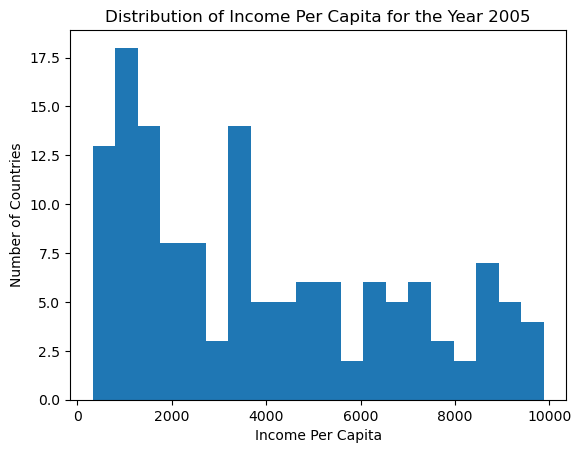

In [3]:
year = '2005'

income_per_capita = income_df[year]
income_per_capita = pd.to_numeric(income_per_capita, errors='coerce')

plt.hist(income_per_capita, bins=20)
plt.title(f'Distribution of Income Per Capita for the Year {year}')
plt.xlabel('Income Per Capita')
plt.ylabel('Number of Countries')
plt.show()

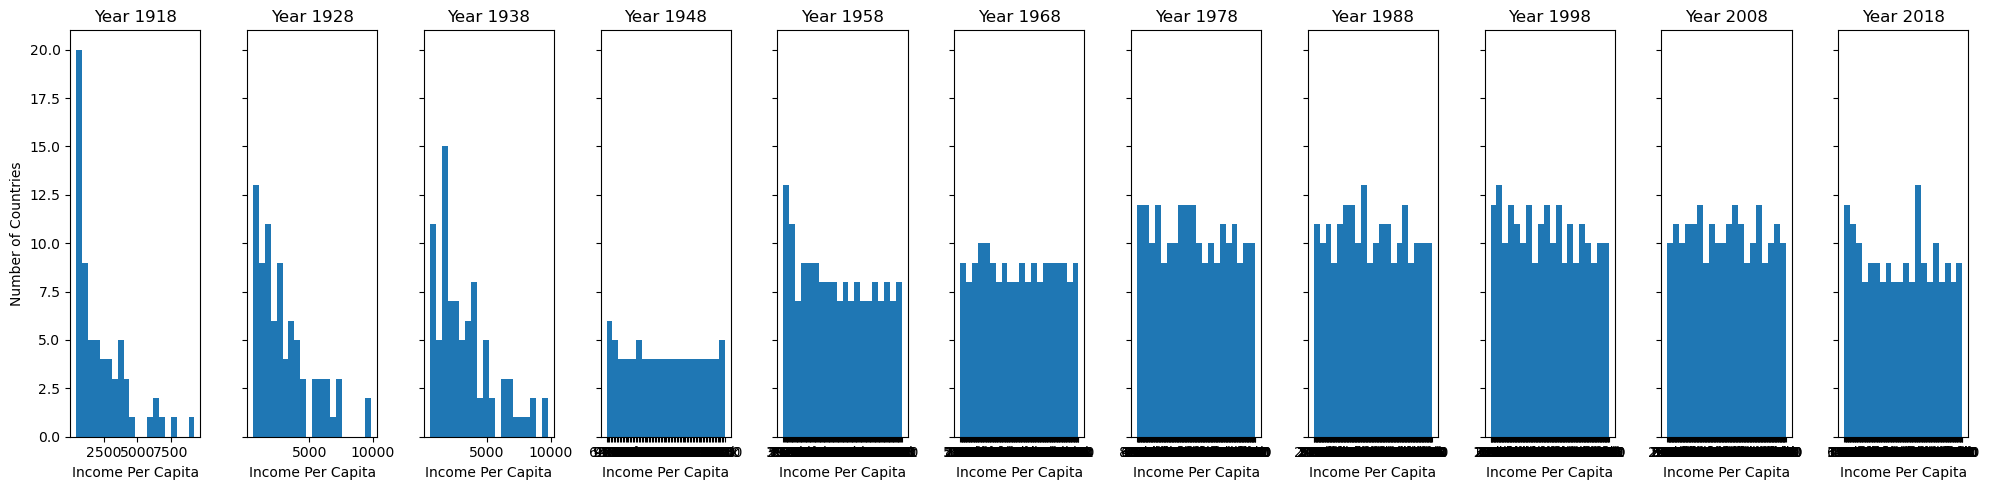

In [4]:
years = ['1918','1928','1938','1948','1958','1968','1978', '1988', '1998', '2008','2018']

fig, axes = plt.subplots(1, len(years), figsize=(20, 5), sharey=True) 

for i, year in enumerate(years):
    income_per_capita = income_df[year].dropna()
    
    axes[i].hist(income_per_capita, bins=20)
    axes[i].set_title(f'Year {year}')
    axes[i].set_xlabel('Income Per Capita')
    if i == 0:
        axes[i].set_ylabel('Number of Countries')

plt.tight_layout()
plt.show()

**c)** Write a function that merges the  *countries*, *income* and *life_exp* DataFrames for a given year. The year should be the function's input. (Hint: Use the *pd.merge()* function!)

In [5]:
def mergeDataFrames(year):
    
    income = income_df
    life = life_df
    countries = countries_df
    countries = countries.rename(columns={'Country': 'country'})

    merged = pd.merge(countries, income, how="inner", on="country")
    merged = merged.loc[:, ['country', year]]
    new_col_name = "income (" + year + ")"
    merged = merged.rename(columns={year:new_col_name})

    merged = pd.merge(merged, life, how="inner", on="country")
    merged = merged.loc[:, ['country', new_col_name, year]]
    new_col_name = "life_exp (" + year + ")"
    merged = merged.rename(columns={year:new_col_name})
    
    return merged

**d)** Use the dataframe created in part c) to represent the relationship between income per capita and life expectancy for a given year using a [scatter plot](https://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.DataFrame.plot.scatter.html). (Hint: choose a year where there aren't many missing values!)

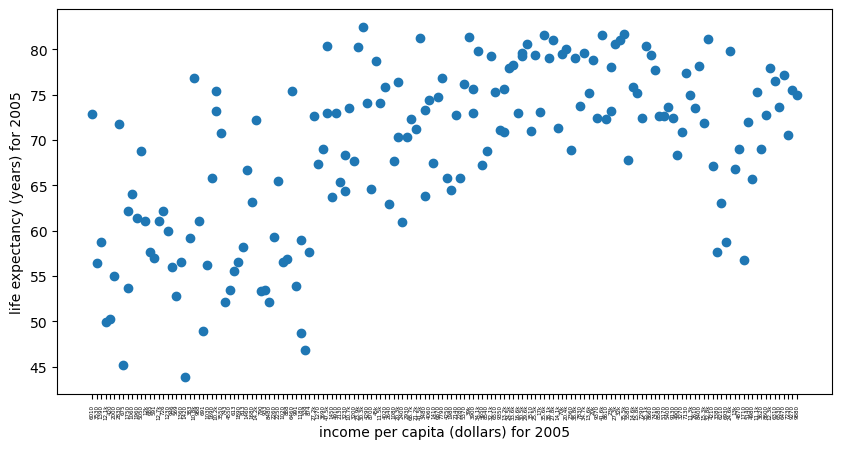

In [6]:
scatter_data = mergeDataFrames('2005')

x = scatter_data['income (2005)']
y = scatter_data['life_exp (2005)']

plt.figure(figsize=(10, 5))
plt.scatter(x,y)
plt.xlabel('income per capita (dollars) for 2005')
plt.ylabel('life expectancy (years) for 2005')
plt.xticks(rotation=90) 
plt.tick_params(axis='x', labelsize=4)
plt.show()

**e)** Present [boxplots](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.boxplot.html) of the distribution of income per capita (across countries) for the years 1950 and 2010 grouped by region (continent). There should be a boxplot for each region (x axis) and income should be on the y axis. <span style="color:red"> Which countries are outliers?</span>(Hint: Use a logarithmic scale for the income axis!)

**Scroll past code, graphs to see the outlier countries printed**

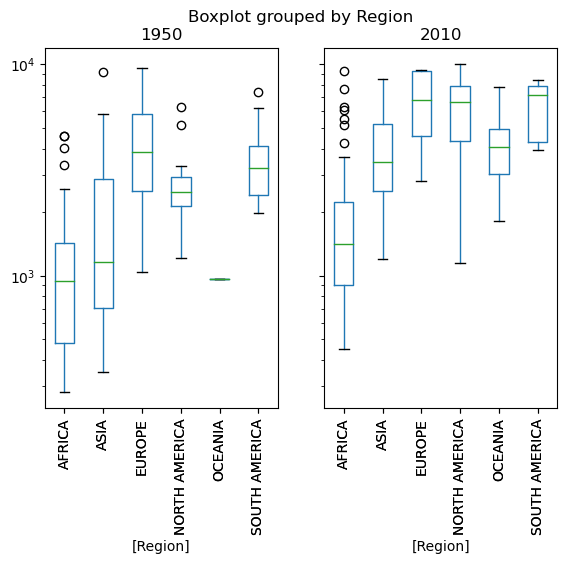

In [7]:
# Preserve original dataframes by working on copies
income = income_df
life = life_df
countries = countries_df
countries = countries.rename(columns={'Country': 'country'})

selected = pd.merge(countries, income, how="inner", on="country")
selected = selected.loc[:, ['Region','country','1950','2010']]

selected['1950'] = pd.to_numeric(selected['1950'], errors='coerce')
selected['2010'] = pd.to_numeric(selected['2010'], errors='coerce')

boxplot = selected.boxplot(by='Region', rot=90, grid=False)
plt.yscale('log')
plt.show()

In [8]:
def find_outliers(data, year):
    q1 = data[year].quantile(0.25)
    q3 = data[year].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    outliers = data[(data[year] < lower_bound) | (data[year] > upper_bound)]
    
    return outliers

In [9]:
def concatenate_outliers():
    africa_data = selected[selected['Region'] == 'AFRICA']
    asia_data = selected[selected['Region'] == 'ASIA']
    europe_data = selected[selected['Region'] == 'EUROPE']
    na_data = selected[selected['Region'] == 'NORTH AMERICA']
    oceania_data = selected[selected['Region'] == 'OCEANIA']
    sa_data = selected[selected['Region'] == 'SOUTH AMERICA']
    
    # Africa
    outliers_1950 = find_outliers(africa_data, '1950')
    outliers_2010 = find_outliers(africa_data, '2010')

    # Asia
    outliers_1950 = pd.concat([outliers_1950, find_outliers(asia_data, '1950')], ignore_index=True)
    outliers_2010 = pd.concat([outliers_2010, find_outliers(asia_data, '2010')], ignore_index=True)

    # Europe
    outliers_1950 = pd.concat([outliers_1950, find_outliers(europe_data, '1950')], ignore_index=True)
    outliers_2010 = pd.concat([outliers_2010, find_outliers(europe_data, '2010')], ignore_index=True)

    # North America
    outliers_1950 = pd.concat([outliers_1950, find_outliers(na_data, '1950')], ignore_index=True)
    outliers_2010 = pd.concat([outliers_2010, find_outliers(na_data, '2010')], ignore_index=True)

    # Oceania
    outliers_1950 = pd.concat([outliers_1950, find_outliers(oceania_data, '1950')], ignore_index=True)
    outliers_2010 = pd.concat([outliers_2010, find_outliers(oceania_data, '2010')], ignore_index=True)

    # South America
    outliers_1950 = pd.concat([outliers_1950, find_outliers(sa_data, '1950')], ignore_index=True)
    outliers_2010 = pd.concat([outliers_2010, find_outliers(sa_data, '2010')], ignore_index=True)

    return outliers_1950, outliers_2010

In [10]:
outliers_1950, outliers_2010 = concatenate_outliers()

print("Outliers in 1950:")
print(outliers_1950[['Region', 'country', '1950']])

print("\nOutliers in 2010:")
print(outliers_2010[['Region', 'country', '2010']])

Outliers in 1950:
          Region       country    1950
0         AFRICA        Angola  3360.0
1         AFRICA         Gabon  4040.0
2         AFRICA    Seychelles  4580.0
3         AFRICA  South Africa  4580.0
4           ASIA       Bahrain  9160.0
5  NORTH AMERICA       Bahamas  6290.0
6  NORTH AMERICA          Cuba  5180.0
7  SOUTH AMERICA     Venezuela  7380.0

Outliers in 2010:
   Region       country    2010
0  AFRICA       Algeria  6300.0
1  AFRICA        Angola  5500.0
2  AFRICA         Egypt  6060.0
3  AFRICA       Morocco  4260.0
4  AFRICA       Namibia  5160.0
5  AFRICA  South Africa  9320.0
6  AFRICA       Tunisia  7670.0


**f)** Investigate a few of the outlier countries found in part e). Plot the change in income per capita (y) over time (x) for these countries. Countries should be represented with different colored lines on the plot. Include a key with country names. Research at least one country, especially years in which you see the income per capita rapidly increase or decline. <span style="color:red"> Make guesses as to why these countries are outliers and what events may have caused the fluxuations you see in the line plots?</span>

**In 1950, Angola, Gabon, Seychelles and South Africa have income per capitas that are much higher than the rest of Africa. Bahrain is the outlier in Asia. Bahamas and Cuba are the outliers in N. America. Venezuala in S. America.** 
In the 1950s, most of Africa was either gaining independence or fighting for it. Angola, Gabon, Seychelles and South Africa were still colonies, with Angola and South Africa locals suffering brutal apartheid and exploitation. I suspect the income data here is largely influened by the incomes of the British and Portuguese who had settled heavily in these regions.          
Gabon was stable and prosperous in the 1950s due to a combination of crude oil and a small population. Seychelles too had a small population, and rich agricultural economy.
In the 1950s, Bahrain and Venezuela were enjoying the proceeds from oil discovered in the 1920s and the 1930s.
The labour movement of the 1950s combined with the proximity to the States and the small population might be why the Bahamas is an an outlier in N.America. 1950s Cuba had a booming tourism industry, fueled by visiting celebrities and socialites from Europe and Canada.

**In 2010, the only outliers are in Africa and are Algeria, Angola, Egypt, Morocco, Namibia, South Africa, Tunisia.**
Algeria, Egypt, Morocco, South Africa, and Tunisia are among the most developed countries in Africa. Angola was enjoying foreign investments in their petroleum industry in the 2000s.

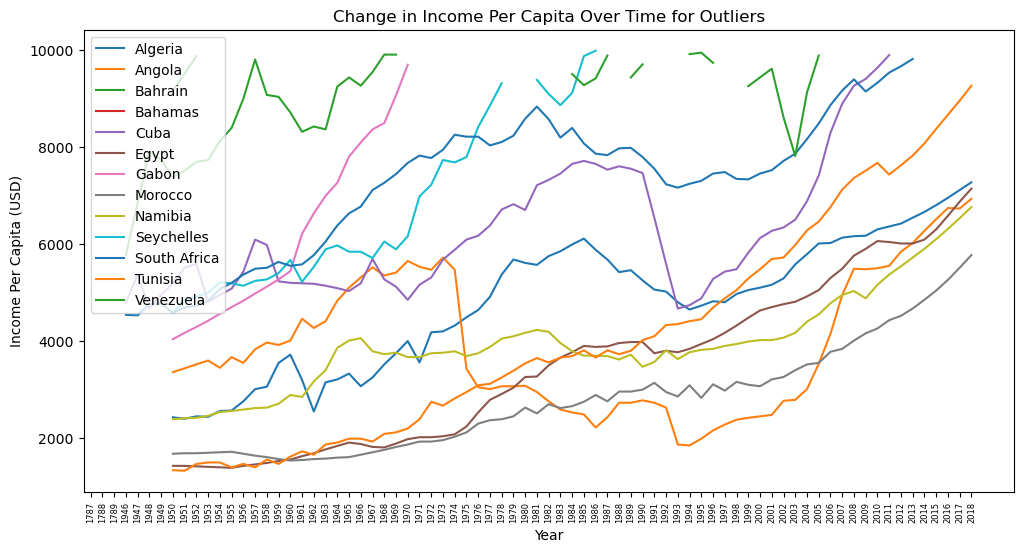

In [11]:
# remove label columns, and years with largely NaN values
def dropItLikeItsHot(data):
    temp = data.drop(['country'], axis=1)
    columns_to_drop = [year for year in temp.columns if 1790 <= int(year) <= 1945]
    temp = temp.drop(columns_to_drop, axis=1)
    return temp

countries = ['Algeria', 'Angola', 'Bahrain', 'Bahamas', 'Cuba', 'Egypt', 'Gabon', 'Morocco', 
             'Namibia', 'Seychelles', 'South Africa', 'Tunisia', 'Venezuela']

angola_x = None
angola_y = None

# collect the years into a pandas series
years = pd.Series(dropItLikeItsHot(income_df).columns)

plt.figure(figsize=(12, 6))
for country in countries:
    # collect and clean income data for this country
    selected_row = income_df[income_df['country'] == country]
    selected_row = dropItLikeItsHot(selected_row)  
    selected_row = selected_row.iloc[0]
    selected_row = pd.to_numeric(selected_row, errors='coerce')
    plt.plot(years, selected_row, label=country)
    
    if country == 'Angola': # isolate angola's data for further research
        angola_x = years
        angola_y = selected_row

plt.title('Change in Income Per Capita Over Time for Outliers')
plt.xlabel('Year')
plt.ylabel('Income Per Capita (USD)')
plt.xticks(rotation=90) 
plt.tick_params(axis='x', labelsize=6)
plt.legend() # to show country labels
plt.show()

#### Angola

Angola's income per capita is closely related to the political tensions in the region.
From 1947 to 1973, during the time that marks both the colonial period and the independence struggle, we see a gradual increase in income. 

But in 1973, the Angola Crisis (where the US and Russia use the country as a Cold War battlefield) starts, and income per capita sees a sharp decline. The crisis escalates into a 27-year long civil war. Smaller bumps in income happen during the fragile periods of peacetime that punctuated the war. And smaller drops (like in 1991) mark the resumption of fighting.

Income per capita never really recovers until after the war ends in 2002. In 2005, the country has stabilized enough to begin to see foreign investment in their petroluem deposits, and this development is marked by the sharpest incline in income per capita in the country's history.
But growth, while still happening, slows as oil prices fluctuate.

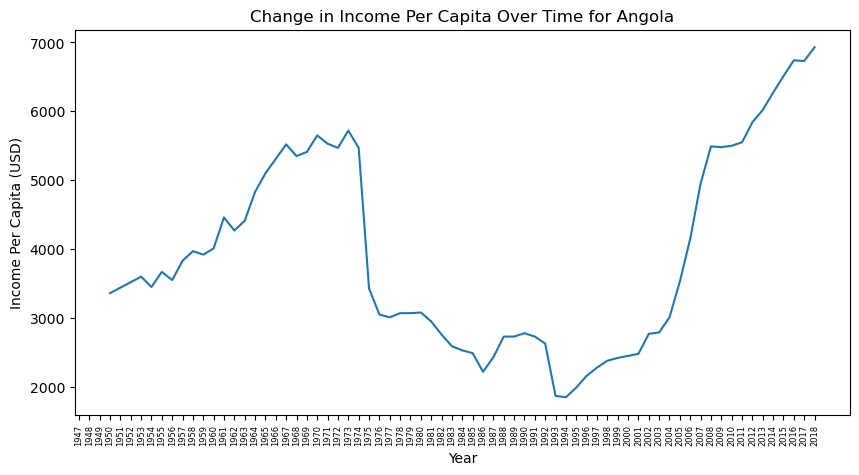

In [12]:
plt.figure(figsize=(10, 5))
plt.plot(angola_x, angola_y)
plt.title('Change in Income Per Capita Over Time for Angola')
plt.xlabel('Year')
plt.ylabel('Income Per Capita (USD)')
plt.xticks(rotation=90) 
plt.tick_params(axis='x', labelsize=6)
plt.show()

**g)** Ask your own question about the data. You can download another data set from gap minder or formulate a new question about the data sets used above. State your question, make a data visualization that answers your question and <span style="color:red">discuss</span>.    

#### How Has Life Expectancy in Nigeria Changed Over The Last Twenty Decades?

I am Nigerian, so I kind of want to know.
Over the last twenty decades, life expectancy in Nigeria has increased (somewhat linearly).
The increase started in the 1860s, which was when the British annexed Lagos. I feel this change in the data can be attributed to the fact that the figures before then are likely estimates and were not actually gathered.
The sharpest incline comes in the 2000s with the end of military tensions and the introduction of democracy.

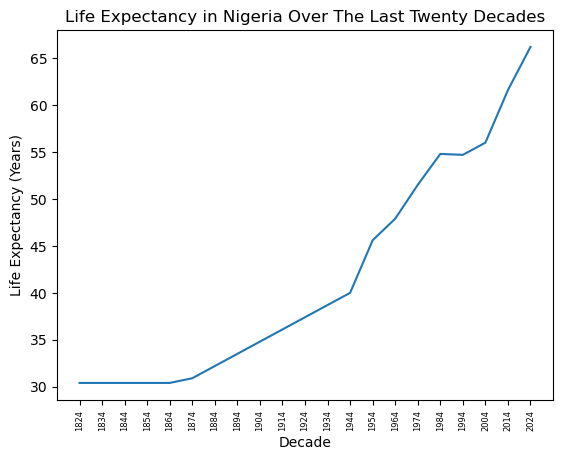

In [13]:
life_ng = life_df[life_df['country'] == 'Nigeria']

years_to_use = ['1824','1834','1844','1854','1864','1874','1884','1894','1904','1914','1924','1934','1944','1954','1964','1974','1984','1994','2004','2014','2024']
all_years = life_ng.columns

for year in all_years:
    if year not in years_to_use:
        life_ng = life_ng.drop(year, axis=1)
        
x_ax = pd.Series(years_to_use)
y_ax = life_ng.iloc[0]

plt.plot(x_ax, y_ax)
plt.title('Life Expectancy in Nigeria Over The Last Twenty Decades')
plt.xlabel('Decade')
plt.ylabel('Life Expectancy (Years)')
plt.xticks(rotation=90) 
plt.tick_params(axis='x', labelsize=6)
plt.show()

## Exercise 2 

Exploratory data analysis (EDA) plays a very important role in data science projects. It helps us understand the data and explore the hidden relations between variables. Moreover, it helps us in the selection of the appropriate statistical and machine learning tools and techniques. In this problem we are going to perform an exploratory data analysis on 120 years of Olympics data. (50%)

**a)** Download the data from [this Kaggle data repository](https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results?select=athlete_events.csv) and load the athlete_event.csv file into a pandas DataFrame called olympics120. Filter the DataFrame so that it only contains data about the Summer season. (Hint: you can use the pandas query() function).

In [14]:
olympics120 = pd.read_csv("../Data-20240213/athlete_events.csv")
olympics120 = olympics120[olympics120['Season'] =='Summer']

**b)** Retrieve some basic descriptive statistics about the dataset using the .describe() method of pandas DataFrames. Now, try to guess which sports have the shortest, tallest (height column), heaviest, lightest (weight column), youngest and oldest (age column) athletes in the Olympics. Then, check your guess based on the data! Print out which sport has the tallest, shortest, heaviest, lightest, youngest and oldest athletes.

In [15]:
olympics120.describe()

,ID,Age,Height,Weight,Year
count,222552.000000,213363.000000,170695.000000,168698.00000,222552.000000
mean,67998.925712,25.674053,175.515551,70.68906,1976.317094
std,39139.038228,6.699839,10.914725,14.80394,30.942802
min,1.000000,10.000000,127.000000,25.00000,1896.000000
25%,34000.750000,21.000000,168.000000,60.00000,1956.000000
50%,68302.500000,24.000000,175.000000,70.00000,1984.000000
75%,101881.000000,28.000000,183.000000,79.00000,2000.000000
max,135568.000000,97.000000,226.000000,214.00000,2016.000000


In [16]:
print("Avalaible sports are:\n", olympics120['Sport'].unique())

# '''
# My Guesses...
# shortest = Gymnastics
# tallest = Basketball
# lightest = Swimming
# heaviest = Weightlifting
# youngest = Figure Skating
# oldest = Equestrianism
# '''

Avalaible sports are:
 ['Basketball' 'Judo' 'Football' 'Tug-Of-War' 'Athletics' 'Swimming'
 'Badminton' 'Sailing' 'Gymnastics' 'Art Competitions' 'Handball'
 'Weightlifting' 'Wrestling' 'Water Polo' 'Hockey' 'Rowing' 'Fencing'
 'Equestrianism' 'Shooting' 'Boxing' 'Taekwondo' 'Cycling' 'Diving'
 'Canoeing' 'Tennis' 'Modern Pentathlon' 'Golf' 'Softball' 'Archery'
 'Volleyball' 'Synchronized Swimming' 'Table Tennis' 'Baseball'
 'Rhythmic Gymnastics' 'Rugby Sevens' 'Trampolining' 'Beach Volleyball'
 'Triathlon' 'Rugby' 'Lacrosse' 'Polo' 'Cricket' 'Ice Hockey' 'Racquets'
 'Motorboating' 'Croquet' 'Figure Skating' 'Jeu De Paume' 'Roque'
 'Basque Pelota' 'Alpinism' 'Aeronautics']


In [17]:
min_height = olympics120['Height'].min()
max_height = olympics120['Height'].max()

min_weight = olympics120['Weight'].min()
max_weight = olympics120['Weight'].max()

min_age    = olympics120['Age'].min()
max_age    = olympics120['Age'].max()

shortest_athletes = olympics120[olympics120['Height'] == min_height]
tallest_athletes  = olympics120[olympics120['Height'] == max_height]

lightest_athletes = olympics120[olympics120['Weight'] == min_weight]
heaviest_athletes = olympics120[olympics120['Weight'] == max_weight]

youngest_athletes = olympics120[olympics120['Age'] == min_age]
oldest_athletes   = olympics120[olympics120['Age'] == max_age]


print("Shortest Sports:")
unique_sports = shortest_athletes['Sport'].unique()
for sport in unique_sports:
    print(sport)
    
print()
print("Tallest Sports:")
unique_sports = tallest_athletes['Sport'].unique()
for sport in unique_sports:
    print(sport)
    
print()
print("Lightest Sports:")
unique_sports = lightest_athletes['Sport'].unique()
for sport in unique_sports:
    print(sport)
    
print()
print("Heaviest Sports:")
unique_sports = heaviest_athletes['Sport'].unique()
for sport in unique_sports:
    print(sport)
    
print()
print("Youngest Sports:")
unique_sports = youngest_athletes['Sport'].unique()
for sport in unique_sports:
    print(sport)
    
print()
print("Oldest Sports:")
unique_sports = oldest_athletes['Sport'].unique()
for sport in unique_sports:
    print(sport)

Shortest Sports:
Gymnastics
Boxing

Tallest Sports:
Basketball

Lightest Sports:
Gymnastics

Heaviest Sports:
Judo

Youngest Sports:
Gymnastics

Oldest Sports:
Art Competitions


**c)** Consider only the male athletes of the following sports: Basketball, Gymnastics, Wrestling. Make a scatter plot in which the x axis shows the athletes' weights and the y axis shows the athletes' heights. Each sport should be represented by a different color point on the plot. Make one scatter plot like this for the 2012 London Olympics, and another for the 1960 Rome Olympics. (Hints: You can create the scatterplots with the .scatterplot() function of the seaborn package. You can place the scatterplots next to each other with the help of the .subplot() function of the matplotlib.pyplot package. You can fix the scales of the axes with the matplotlib.pyplot.xlim([lower, upper]) function. It is not required to use these hints, but seaborn and matplotlib are good libraries to explore for plotting.) <span style="color:red">What is the relationship between the heights and weights of athletes in these sports?</span> 

**The heights and weights of athletes, in all three sports, have a positive and linear relationship.**

In [18]:
male_bgw = olympics120
male_bgw = olympics120[olympics120['Sex'] == 'M']
male_bgw = male_bgw[(male_bgw['Sport'] == 'Basketball') | 
                    (male_bgw['Sport'] == 'Gymnastics') | 
                    (male_bgw['Sport'] == 'Wrestling')]

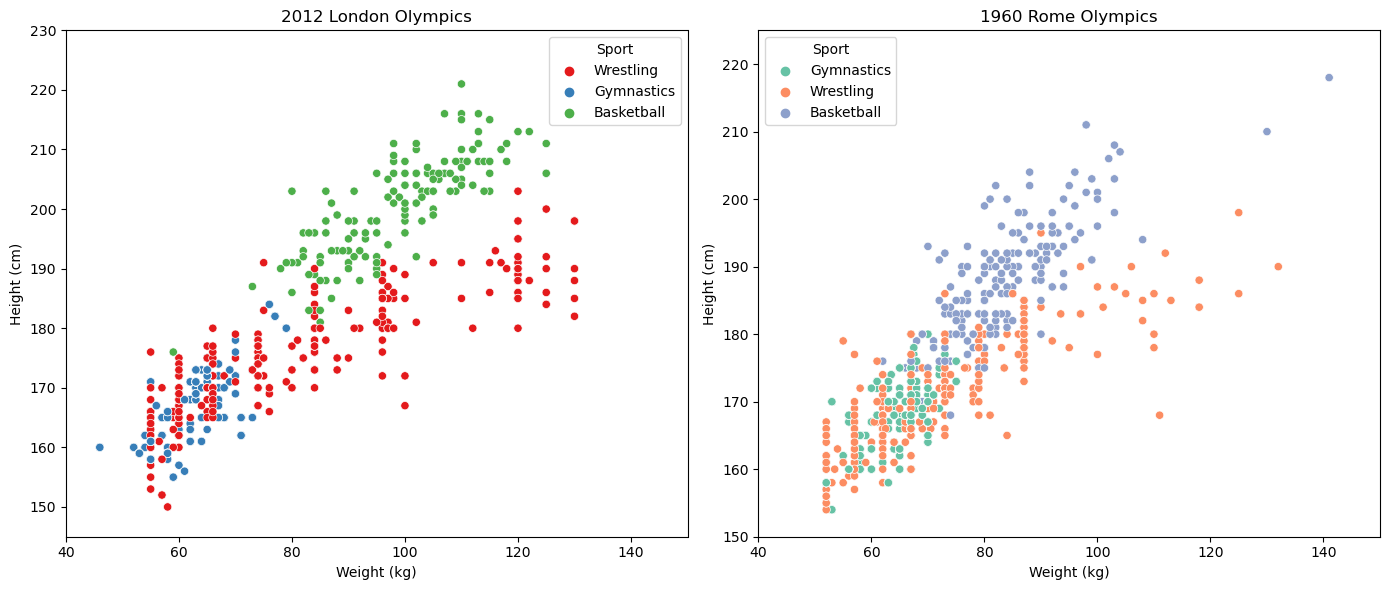

In [19]:
london_2012 = male_bgw[(male_bgw['Year'] == 2012) & (male_bgw['City'] == 'London')]
rome_1960 = male_bgw[(male_bgw['Year'] == 1960) & (male_bgw['City'] == 'Roma')]

# Set up the matplotlib figure
plt.figure(figsize=(14, 6))

# the 2012 London Olympics
plt.subplot(1, 2, 1) # (rows, columns, panel number)
sns.scatterplot(x='Weight', y='Height', hue='Sport', data=london_2012, palette='Set1')
plt.title('2012 London Olympics')
plt.xlabel('Weight (kg)')
plt.ylabel('Height (cm)')
plt.xlim([40, 150])
plt.ylim([145, 230])

# the 1960 Rome Olympics
plt.subplot(1, 2, 2)
sns.scatterplot(x='Weight', y='Height', hue='Sport', data=rome_1960, palette='Set2')
plt.title('1960 Rome Olympics')
plt.xlabel('Weight (kg)')
plt.ylabel('Height (cm)')
plt.xlim([40, 150]) # Keeping the same scale for easy comparison
plt.ylim([150, 225])

plt.tight_layout()
plt.show()

**d)** We are curious about which countries have the most gold medals per 1 million people. <br>
- Calculate how many gold medals the each country won per year at the Summer Olympics. **Hints:** You can filter the data with the query() function, keeping only the rows with gold medals. Then you can groupby() the country name and year attributes, and use .apply(lambda x: len(pd.unique(x))) on the Events column: <br> <br> gold_medals=DataFramegolds.groupby(['NOC', 'Year']).Event.apply(lambda x: len(pd.unique(x))) <br> <br>   

<span style="color:red">Describe what the above line of code is doing</span>      
**- groupby(NOC, Year) groups the rows in DataFramegolds by their country and year columns**    
**- on the Event column, apply a function defined by lambda x**    
**- len(pd.unique(x)) counts how many unique entries there are in the Event column**    
**- so, 'gold_medals' will hold the no of unique events for which each NOC/country has won gold, per year**   


- Load the population data from https://math.bme.hu/~pinterj/BevAdat1/Adatok/OlympicsPopulation.xlsx into a pandas DataFrame without downloading the file, then merge the two tables and calculate a gold metals per 1million capita column. <span style="color:red">Which countries have the most gold medals per one million people?</span>   
**Finland, Hungary, Bahrain, Switzerland, Norway**

In [20]:
population = pd.read_excel(
    'https://math.bme.hu/~pinterj/BevAdat1/Adatok/OlympicsPopulation.xlsx')

gold_df = olympics120[olympics120['Medal']=='Gold']
gold_medals = gold_df.groupby(['NOC', 'Year']).Event.apply(lambda x: len(pd.unique(x)))
total_gold = gold_medals.groupby('NOC').sum().reset_index()

merged = pd.merge(total_gold, population, how='left', on='NOC')
merged['gold per million'] = (merged['Event'] / merged['POPULATION']) * 1e6
merged = merged.rename(columns={'Event':'gold medals', 'POPULATION':'population'})

# print just the largest
max_gold_per_million = merged['gold per million'].max()
gold_nations = merged[merged['gold per million'] == max_gold_per_million]
gold_nations

# print the five largest
merged.nlargest(5, 'gold per million')

,NOC,gold medals,population,gold per million
33,FIN,104,5530719.0,18.804065
44,HUN,178,9749763.0,18.256854
7,BAH,6,393248.0,15.257547
87,SWE,150,10353442.0,14.487936
68,NOR,56,5379475.0,10.409938


## Works Cited:

Please cite all external resources you used to complete this assignment. If you used ChatGPT, please include a link to the conversation.

https://pandas.pydata.org/      
https://matplotlib.org/   
https://en.wikipedia.org/wiki/Angolan_Civil_War  
https://en.wikipedia.org/wiki/1940s_in_Angola     
https://en.wikipedia.org/wiki/2000s_in_Tunisia      
https://www.datapandas.org/ranking/most-developed-countries-in-africa       
https://en.wikipedia.org/wiki/Colonial_Africa         
https://en.wikipedia.org/wiki/History_of_the_Bahamas   
https://www.smithsonianmag.com/history/before-the-revolution-159682020/     
